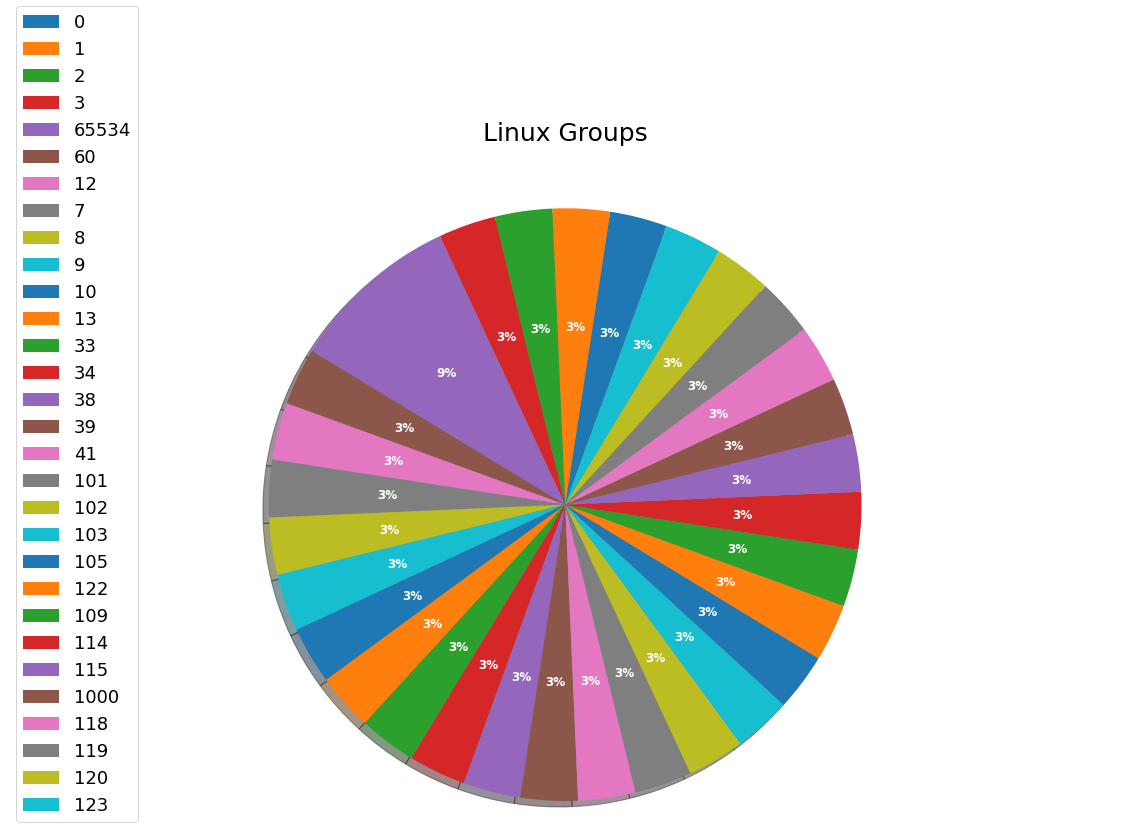

In [4]:
from json import dumps
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

passwd_data = {
    "groups": {},
    "shells": {}
}

shadow_data = {
    "lastchg_days": {},
    "min_days": {},
    "max_days": {},
    "warn_days": {},
    "inactive_days": {},
    "disabled_days": {}
}

def passwd_parse(filename):
    
    with open(filename) as passwd:
        for line in passwd:
            if not line.startswith(('#', '\n')):
                user_info = line.split(':')
                
                username = user_info[0]
                group = user_info[3]
                shell = user_info[6].replace("\n","")

                if str(group) not in passwd_data["groups"]:
                    passwd_data["groups"][str(group)] = {}
                    passwd_data["groups"][str(group)]["count"] = 1
                    passwd_data["groups"][str(group)]["users"] = [username]
                else:
                    passwd_data["groups"][str(group)]["count"] += 1
                    passwd_data["groups"][str(group)]["users"].append(username)

                if shell not in passwd_data["shells"]:
                    passwd_data["shells"][shell] = {}
                    passwd_data["shells"][shell]["count"] = 1
                    passwd_data["shells"][shell]["users"] = [username]
                else:
                    passwd_data["shells"][shell]["count"] += 1
                    passwd_data["shells"][shell]["users"].append(username)
            
        return passwd_data
    
def shadow_parse(filename):
    
    with open(filename) as shadow:
        for line in shadow:
            if not line.startswith(('#', '\n')):
                shadow_info = line.split(':')
               
                username = shadow_info[0]
                raw_lastchg_days = shadow_info[2]
                min_days = shadow_info[3]
                max_days = shadow_info[4]
                warn_days = shadow_info[5]
                inactive_days = shadow_info[6]
                disabled_days = shadow_info[7]
                                
                lastchg_days = (datetime(1970,1,1) + timedelta(days=int(raw_lastchg_days))).date().strftime("%Y-%m-%d")
                    
                if lastchg_days not in shadow_data["lastchg_days"]:
                    shadow_data["lastchg_days"][lastchg_days] = {}
                    shadow_data["lastchg_days"][lastchg_days]["count"] = 1
                    shadow_data["lastchg_days"][lastchg_days]["users"] = [username]
                else:
                    shadow_data["lastchg_days"][lastchg_days]["count"] += 1
                    shadow_data["lastchg_days"][lastchg_days]["users"].append(username)
                    
                if str(min_days) not in shadow_data["min_days"]:
                    shadow_data["min_days"][str(min_days)] = {}
                    shadow_data["min_days"][str(min_days)]["count"] = 1
                    shadow_data["min_days"][str(min_days)]["users"] = [username]
                else:
                    shadow_data["min_days"][str(min_days)]["count"] += 1
                    shadow_data["min_days"][str(min_days)]["users"].append(username)
                    
                if str(max_days) not in shadow_data["max_days"]:
                    shadow_data["max_days"][str(max_days)] = {}
                    shadow_data["max_days"][str(max_days)]["count"] = 1
                    shadow_data["max_days"][str(max_days)]["users"] = [username]
                else:
                    shadow_data["max_days"][str(max_days)]["count"] += 1
                    shadow_data["max_days"][str(max_days)]["users"].append(username)
                    
                if str(warn_days) not in shadow_data["warn_days"]:
                    shadow_data["warn_days"][str(warn_days)] = {}
                    shadow_data["warn_days"][str(warn_days)]["count"] = 1
                    shadow_data["warn_days"][str(warn_days)]["users"] = [username]
                else:
                    shadow_data["warn_days"][str(warn_days)]["count"] += 1
                    shadow_data["warn_days"][str(warn_days)]["users"].append(username)
                    
                if str(inactive_days) not in shadow_data["inactive_days"]:
                    shadow_data["inactive_days"][str(inactive_days)] = {}
                    shadow_data["inactive_days"][str(inactive_days)]["count"] = 1
                    shadow_data["inactive_days"][str(inactive_days)]["users"] = [username]
                else:
                    shadow_data["inactive_days"][str(inactive_days)]["count"] += 1
                    shadow_data["inactive_days"][str(inactive_days)]["users"].append(username)
                    
                if str(disabled_days) not in shadow_data["disabled_days"]:
                    shadow_data["disabled_days"][str(disabled_days)] = {}
                    shadow_data["disabled_days"][str(disabled_days)]["count"] = 1
                    shadow_data["disabled_days"][str(disabled_days)]["users"] = [username]
                else:
                    shadow_data["disabled_days"][str(disabled_days)]["count"] += 1
                    shadow_data["disabled_days"][str(disabled_days)]["users"].append(username)
            
        return shadow_data
    
def build_pie_chart(title, labels, sizes):

    fig1, ax1 = plt.subplots()

    patches, texts, autotexts = ax1.pie(sizes, 
                                        labels=None, 
                                        autopct='%1.0f%%',
                                        shadow=True, 
                                        startangle=70)

    ax1.axis('equal')
    plt.title(title, y=1.05, fontsize=25)
    plt.legend( loc="best", labels=labels) 

    for autotext in autotexts:
        autotext.set_color('white')

    plt.setp(autotexts, size=12, weight="bold")

    plt.rcParams["figure.figsize"] = (20,12)
    plt.legend(loc=3, labels=labels, prop={'size': 18})
    plt.show()
    
def main():
    passwd_info = passwd_parse("data/passwd.txt")
    shadow_info = shadow_parse("data/shadow.txt")
    
    group_labels = []
    group_sizes = []

    # Groups
    for group_id, group_data in passwd_data["groups"].items():
        group_labels.append(group_id)
        group_sizes.append(group_data["count"])
        
    build_pie_chart("Linux Groups", group_labels, group_sizes)
    
if __name__ == "__main__":
    main()